Defining an SMA Crossover Strategy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("seabor")

In [4]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [5]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [6]:
sma_s = 50
sma_l = 200

In [7]:
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

In [8]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [9]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [10]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


In [11]:
print(data.columns)

Index(['price', 'SMA_S', 'SMA_L'], dtype='object')


<Axes: title={'center': 'EUR/USD - SMA50 | SMA200'}, xlabel='Date'>

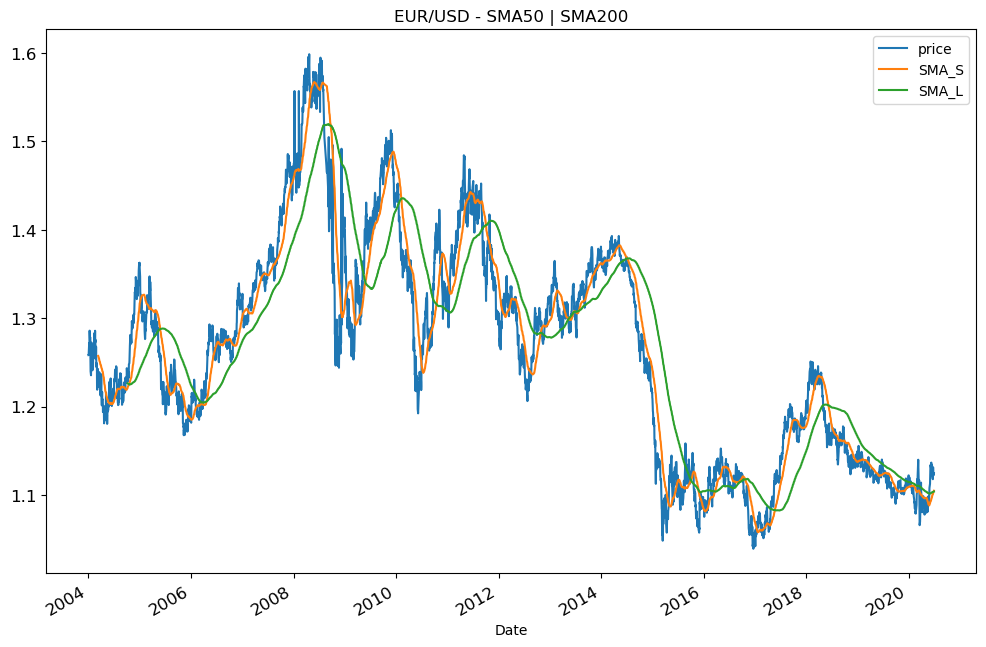

In [12]:
data.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)

In [13]:
data.dropna(inplace = True)

In [14]:
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


<Axes: title={'center': 'EUR/USD - SMA50 | SMA200'}, xlabel='Date'>

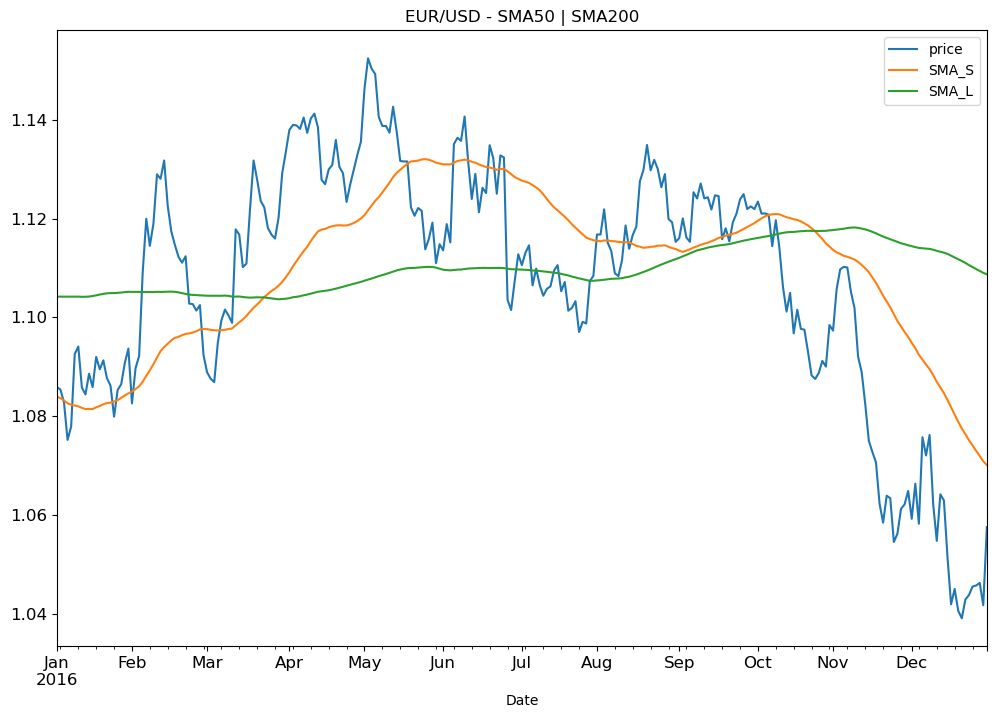

In [15]:
data.loc["2016"].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)

In [16]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)

In [17]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


<Axes: title={'center': 'EUR/USD - SMA50 | SMA200'}, xlabel='Date'>

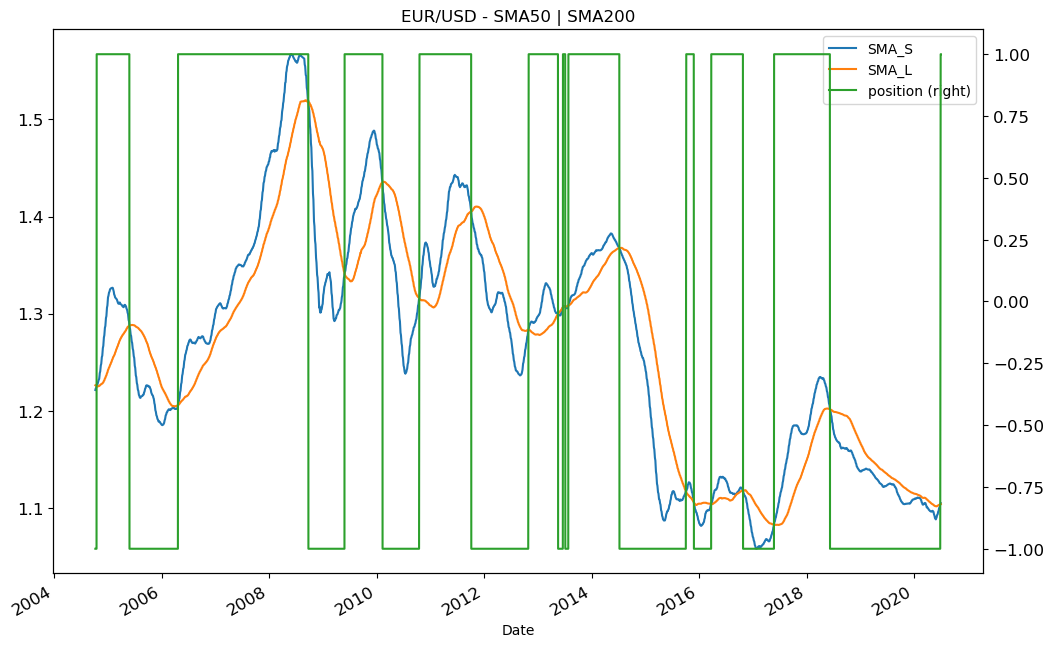

In [18]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(
    figsize=(12, 8), 
    fontsize=12, 
    secondary_y=["position"],  # secondary_y expects a list of column names
    title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l)
)

<Axes: title={'center': 'EUR/USD - SMA50 | SMA200'}, xlabel='Date'>

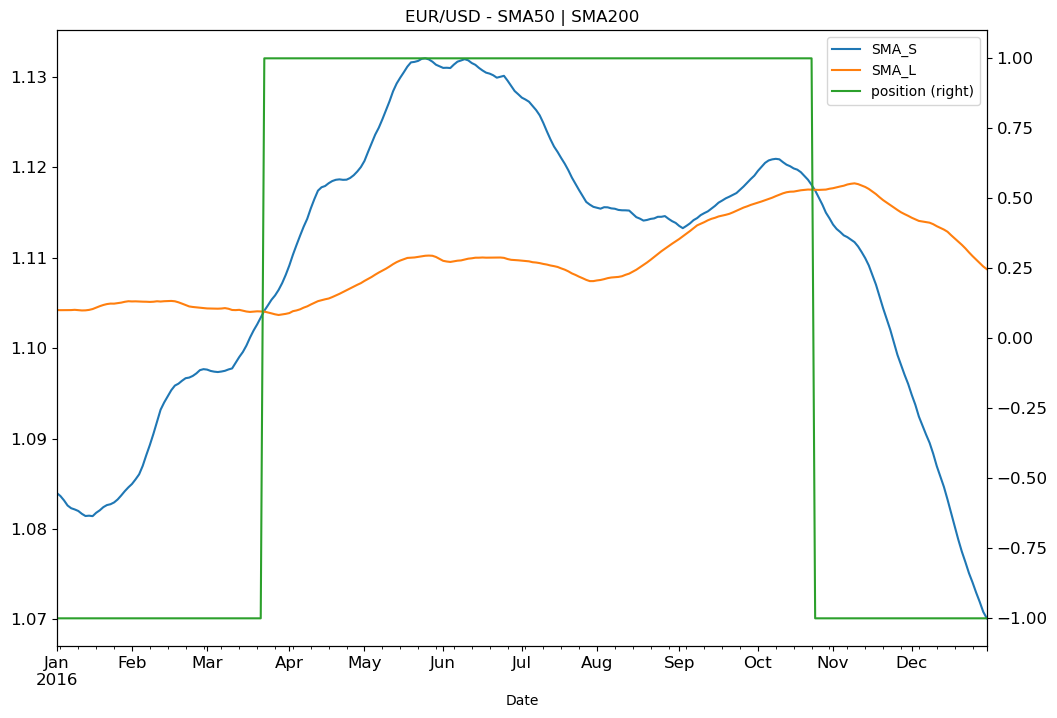

In [19]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(
    figsize=(12, 8), 
    fontsize=12, 
    secondary_y=["position"],  # secondary_y expects a list of column names
    title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l)
)

Vectorized Strategy Backtesting

In [61]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [63]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [65]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,NaN,NaN
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [53]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [55]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [57]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [59]:
data.dropna(inplace = True)

In [69]:
data[["returns", "strategy"]].sum() #performance

returns    -0.089404
strategy    0.251066
dtype: float64

In [71]:
data[["returns", "strategy"]].sum().apply(np.exp)

returns     0.914476
strategy    1.285395
dtype: float64

In [75]:
data[["returns", "strategy"]].mean() * 252

returns    -0.00553
strategy    0.01553
dtype: float64

In [77]:
data[["returns", "strategy"]].std() * np.sqrt(252)

returns     0.120820
strategy    0.120817
dtype: float64

In [83]:
data["creturns"] = data["returns"].cumsum().apply(np.exp) #cumalative returns
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [85]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,NaN,NaN,NaN,NaN
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.009022,0.991059
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.006910,0.993137
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.001787,0.998217
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.004063,0.995954
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.919773,1.273148
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.914775,1.280104
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.912434,1.283388


<Axes: title={'center': 'EUR/USD - SMA(50) | SMA(200)'}, xlabel='Date'>

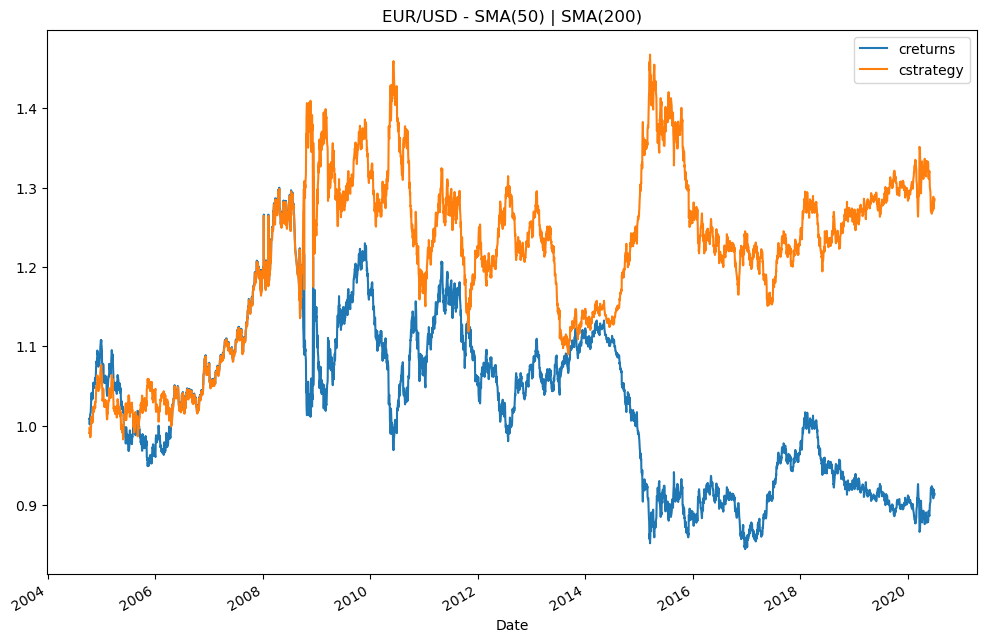

In [89]:
# data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA() | SMA()".format(sma_s, sma_l)
data[["creturns", "cstrategy"]].plot(figsize=(12, 8), title="EUR/USD - SMA({}) | SMA({})".format(sma_s, sma_l))

In [93]:
outper = data.cstrategy.iloc[-1] - data.creturns.iloc[-1] # simple difference between hold and strategy. Strategy must outperform buy and hold. 
outper

0.3709184461522357

Finding the optimal SMA strategy

In [32]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [48]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [34]:
def test_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True )

    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)

    return np.exp(data["strategy"].sum())

In [36]:
test_strategy((50, 200))

1.2835003323288487

In [38]:
test_strategy((75, 150))

1.58974017632631

In [40]:
test_strategy((25, 252))

1.1755957408242586

In [44]:
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [46]:
SMA_S_range

range(10, 50)

In [52]:
from itertools import product

In [54]:
list(product(SMA_S_range, SMA_L_range))

[(10, 100),
 (10, 101),
 (10, 102),
 (10, 103),
 (10, 104),
 (10, 105),
 (10, 106),
 (10, 107),
 (10, 108),
 (10, 109),
 (10, 110),
 (10, 111),
 (10, 112),
 (10, 113),
 (10, 114),
 (10, 115),
 (10, 116),
 (10, 117),
 (10, 118),
 (10, 119),
 (10, 120),
 (10, 121),
 (10, 122),
 (10, 123),
 (10, 124),
 (10, 125),
 (10, 126),
 (10, 127),
 (10, 128),
 (10, 129),
 (10, 130),
 (10, 131),
 (10, 132),
 (10, 133),
 (10, 134),
 (10, 135),
 (10, 136),
 (10, 137),
 (10, 138),
 (10, 139),
 (10, 140),
 (10, 141),
 (10, 142),
 (10, 143),
 (10, 144),
 (10, 145),
 (10, 146),
 (10, 147),
 (10, 148),
 (10, 149),
 (10, 150),
 (10, 151),
 (10, 152),
 (10, 153),
 (10, 154),
 (10, 155),
 (10, 156),
 (10, 157),
 (10, 158),
 (10, 159),
 (10, 160),
 (10, 161),
 (10, 162),
 (10, 163),
 (10, 164),
 (10, 165),
 (10, 166),
 (10, 167),
 (10, 168),
 (10, 169),
 (10, 170),
 (10, 171),
 (10, 172),
 (10, 173),
 (10, 174),
 (10, 175),
 (10, 176),
 (10, 177),
 (10, 178),
 (10, 179),
 (10, 180),
 (10, 181),
 (10, 182),
 (10

In [58]:
combinations = list(product(SMA_S_range, SMA_L_range))

In [60]:
combinations

[(10, 100),
 (10, 101),
 (10, 102),
 (10, 103),
 (10, 104),
 (10, 105),
 (10, 106),
 (10, 107),
 (10, 108),
 (10, 109),
 (10, 110),
 (10, 111),
 (10, 112),
 (10, 113),
 (10, 114),
 (10, 115),
 (10, 116),
 (10, 117),
 (10, 118),
 (10, 119),
 (10, 120),
 (10, 121),
 (10, 122),
 (10, 123),
 (10, 124),
 (10, 125),
 (10, 126),
 (10, 127),
 (10, 128),
 (10, 129),
 (10, 130),
 (10, 131),
 (10, 132),
 (10, 133),
 (10, 134),
 (10, 135),
 (10, 136),
 (10, 137),
 (10, 138),
 (10, 139),
 (10, 140),
 (10, 141),
 (10, 142),
 (10, 143),
 (10, 144),
 (10, 145),
 (10, 146),
 (10, 147),
 (10, 148),
 (10, 149),
 (10, 150),
 (10, 151),
 (10, 152),
 (10, 153),
 (10, 154),
 (10, 155),
 (10, 156),
 (10, 157),
 (10, 158),
 (10, 159),
 (10, 160),
 (10, 161),
 (10, 162),
 (10, 163),
 (10, 164),
 (10, 165),
 (10, 166),
 (10, 167),
 (10, 168),
 (10, 169),
 (10, 170),
 (10, 171),
 (10, 172),
 (10, 173),
 (10, 174),
 (10, 175),
 (10, 176),
 (10, 177),
 (10, 178),
 (10, 179),
 (10, 180),
 (10, 181),
 (10, 182),
 (10

In [62]:
len(combinations)

6080

In [64]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))

In [66]:
results

[0.919639848594834,
 0.9017909001165385,
 0.9088514707606253,
 0.9172039081156574,
 0.9902316124249487,
 0.9839526868794093,
 1.0304555530676556,
 1.0580627844394732,
 1.0209474697557395,
 1.1225414594776157,
 1.1439396770251977,
 1.0928826062479924,
 1.158686928858328,
 1.1472509415077028,
 1.0535678507360313,
 1.0834788006764182,
 1.151663935854727,
 1.1505573494996577,
 1.1653183679562213,
 1.2167014670211942,
 1.2416587315963905,
 1.1667630873747963,
 1.2185865782849303,
 1.1718965787619908,
 1.1816366630339725,
 1.13721357858156,
 1.1858141820530623,
 1.266796025009642,
 1.2954797436418617,
 1.2487089215312812,
 1.2774725832850917,
 1.2815688488537094,
 1.315601386000957,
 1.3268193066021445,
 1.3746941118458667,
 1.3435175722121493,
 1.383038780593678,
 1.3973468547986456,
 1.3933923926338347,
 1.3202781031636979,
 1.3108447683042326,
 1.3519662172615805,
 1.2755744454123736,
 1.2512368246963703,
 1.1986108264031603,
 1.1860503041698052,
 1.2053044885749076,
 1.2413672239985285,


In [68]:
np.max(results)

2.5266939897810787

In [70]:
np.argmax(results)

5509

In [72]:
combinations[np.argmax(results)]

(46, 137)

In [74]:
many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
many_results

,SMA_S,SMA_L
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250


In [76]:
many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
many_results

,SMA_S,SMA_L
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250
